# Disks Temperature (T$_{mm}$) from resolved disks 

Leonardo Testi - Gothenburg 5 June 2016

We use the fits made to the resolved Lupus disks (and the masses computed with the disk models) to attempt to derive an empirical relationship for T$_{mm}$ such that applying this T$_{mm}$ to unresolved disk photometry we derive an approximately correct value of the disk mass.


In [189]:
import numpy as np
#import scipy.stats as ss
import scipy.optimize as so
#import matplotlib
import matplotlib.pyplot as plt
#import astropy.io.fits as aiof
import astropy.io.ascii as aio
#from spectral_cube import SpectralCube
#import pyregion
import astropy.units as u
#from astropy.analytic_functions import blackbody_nu
from astropy.coordinates import SkyCoord
#import aplpy
#import os

import my_tmm_classes as mytmm

%matplotlib inline 
matplotlib.rcParams['axes.linewidth'] = 4.5
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.size'] = 24

#tm = aio.read('table_fits_results_g.txt')

### Update table on disk with T$_{mm}$

In [186]:
lup = mytmm.DiskSample('table_fits_results_g.txt')

#[plt.plot(lup.stars[i].lmstar,np.log10(lup.stars[i].mdust),'o',color='b') for i in range(len(lup.stars))]
#for i in range(len(lup.stars)):
#    print('{0} {1} F={2} M={3}+{4}-{5} Tmm={6}+{7}-{8}'.format(lup.stars[i].star_id, lup.stars[i].star_name, lup.stars[i].fcont, lup.stars[i].mdust, lup.stars[i].mdust-lup.stars[i].mdust_16, lup.stars[i].mdust_84-lup.stars[i].mdust, lup.stars[i].tmm_fs[0], lup.stars[i].tmm_fs_16[0]-lup.stars[i].tmm_fs[0], lup.stars[i].tmm_fs[0]-lup.stars[i].tmm_fs_84[0]))
    
lup.write_table('test_out.txt')
print('{0}'.format(lup))

Table of Disk observed and fitted properties, read from file table_fits_results_g.txt containing 33 objects (23 validated)


### Figure of T$_{mm}$ against all parameters (stellar and disk)

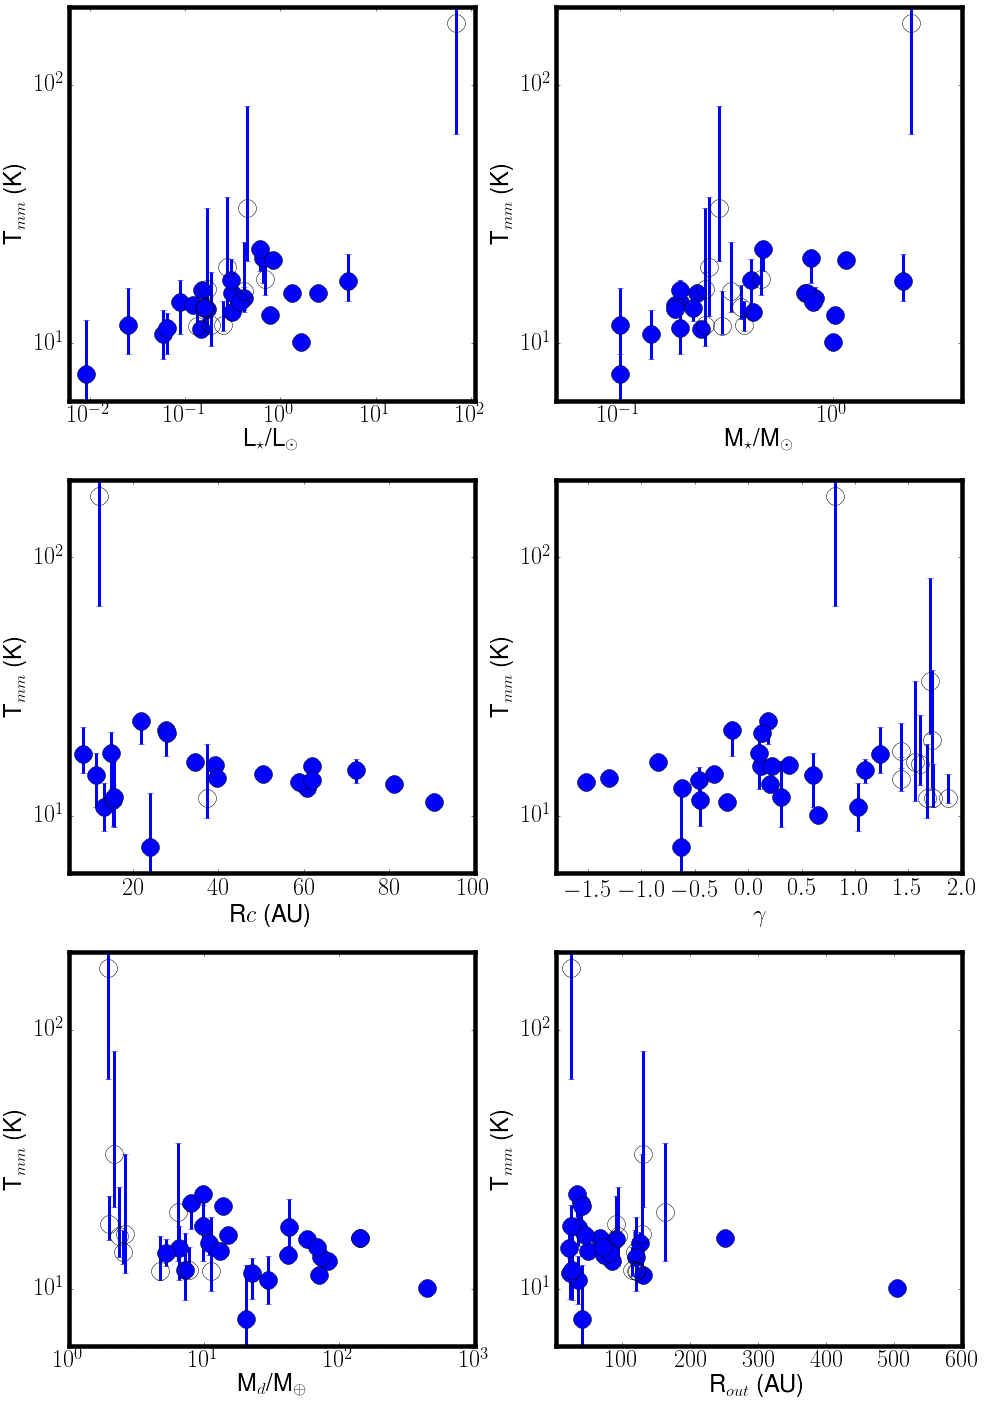

In [190]:
reload(mytmm)

trange = [6.,200.]
#grange = [-2.,2.]
#lrange = [0.05,110.]
#msrange = [0.05,4.]
#mdrange = [1.,1000.]
rcrange = [5.,100.]
#routrange = [2.,600.]

lup2 = mytmm.DiskSample('table_fits_results_g.txt')
fig, axf = lup2.do_6_par_plot(newfig=True, mytrange=trange, myrcrange=rcrange)
#lup2.do_6_par_plot(ax=axf, newfig=False, mycolor='red', mysymbol='x')

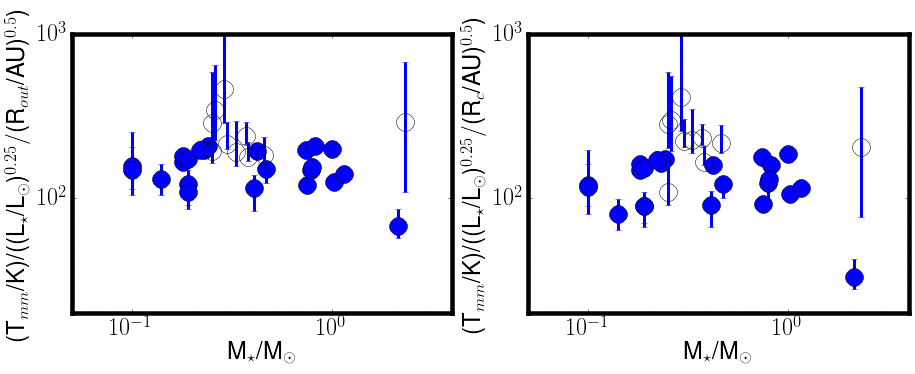

In [191]:
reload(mytmm)

msrange = [0.05,4.]
yrange = [20.,1000.]

lup2 = mytmm.DiskSample('table_fits_results_g.txt')
fig, axf = lup2.do_LR_plot(newfig=True, myyrange=yrange, myxrange=msrange)

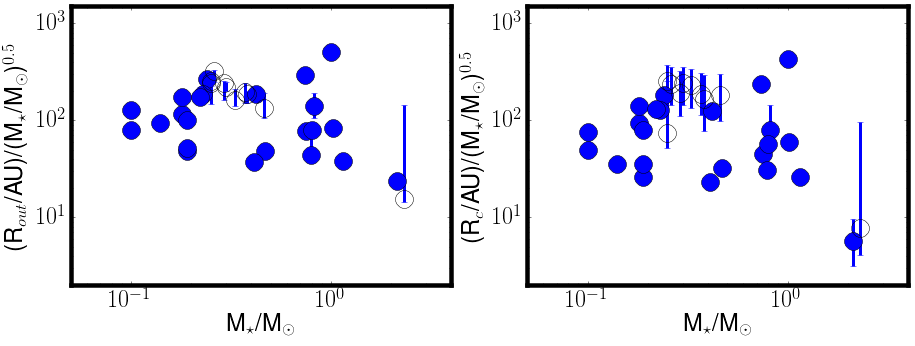

In [198]:
# Do we see a relationship between Mstar and Rout (or Rc)?

reload(mytmm)

msrange = [0.05,4.]
rcrange = [5.,100.]
routrange = [2.,1500.]

lup2 = mytmm.DiskSample('table_fits_results_g.txt')
fig, axf = lup2.do_RM_plot(newfig=True, myyrange=routrange, myxrange=msrange)

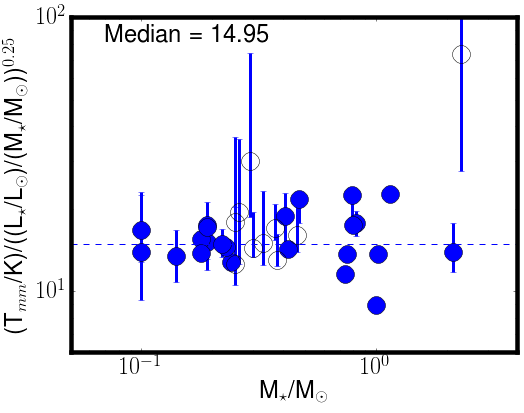

In [211]:
# Can we use Ls/Ms instead of Ls/Rc^2 ??

reload(mytmm)

msrange = [0.05,4.]
rcrange = [5.,100.]
yrange = [6.,100.]

lup2 = mytmm.DiskSample('table_fits_results_g.txt')
fig = lup2.do_LM_plot(newfig=True, myyrange=yrange, myxrange=msrange)

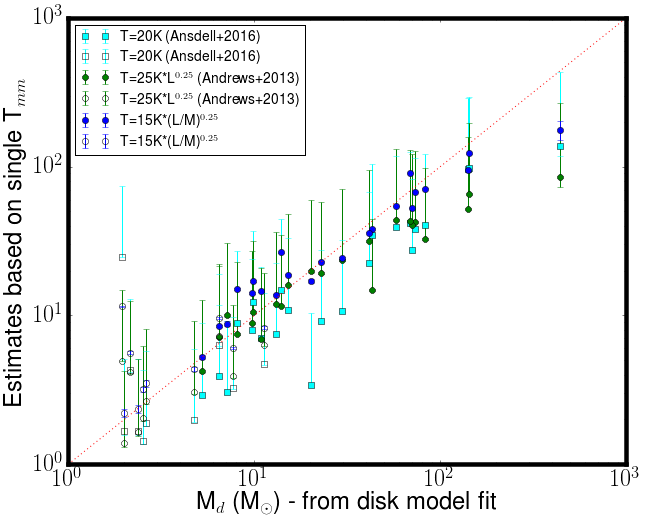

In [243]:
# Try to ee what happens...

reload(mytmm)

msrange = [0.05,4.]
rcrange = [5.,100.]
yrange = [6.,100.]

lup2 = mytmm.DiskSample('table_fits_results_g.txt')
lup2.calc_tlt(15.)
lup2.calc_ta()
lup2.calc_md_tlt(nu = 340.*u.GHz, k340 = 3.4)

fig = plt.figure(figsize=(10,8))

#plt.plot(lup2.mytable[lup2.nval]['M_dust_50'],lup2.mytable[lup2.nval]['M_dust'],'s',color='cyan', label='T=20K (Ansdell+2016)')
plt.errorbar(lup2.mytable[lup2.nval]['M_dust_50'],lup2.m20k[lup2.nval],
             yerr=[lup2.m20k_em[lup2.nval],lup2.m20k_ep[lup2.nval]],
             fmt='s',color='cyan', label='T=20K (Ansdell+2016)')
plt.errorbar(lup2.mytable[lup2.ninval]['M_dust_50'],lup2.m20k[lup2.ninval],
             yerr=[lup2.m20k_em[lup2.ninval],lup2.m20k_ep[lup2.ninval]],
             fmt='s',color='cyan', mfc='none', label='T=20K (Ansdell+2016)')

plt.errorbar(lup2.mytable[lup2.nval]['M_dust_50'],lup2.mta[lup2.nval],
             yerr=[lup2.mta_em[lup2.nval],lup2.mta_ep[lup2.nval]],
             fmt='8',color='g', label=r'T=25K*L$^{0.25}$ (Andrews+2013)')
plt.errorbar(lup2.mytable[lup2.ninval]['M_dust_50'],lup2.mta[lup2.ninval],
             yerr=[lup2.mta_em[lup2.ninval],lup2.mta_ep[lup2.ninval]],
             fmt='8',color='g', mfc='none', label=r'T=25K*L$^{0.25}$ (Andrews+2013)')

plt.errorbar(lup2.mytable[lup2.nval]['M_dust_50'],lup2.mlt[lup2.nval],
             yerr=[lup2.mlt_em[lup2.nval],lup2.mlt_ep[lup2.nval]],
             fmt='o',color='b', label=r'T=15K*(L/M)$^{0.25}$')
plt.errorbar(lup2.mytable[lup2.ninval]['M_dust_50'],lup2.mlt[lup2.ninval],
             yerr=[lup2.mlt_em[lup2.ninval],lup2.mlt_ep[lup2.ninval]],
             fmt='o',color='b', mfc='none', label=r'T=15K*(L/M)$^{0.25}$')

#plt.plot(lup2.mytable[lup2.nval]['M_dust_50'],lup2.m20k[lup2.nval],'+',color='k')
#plt.plot(lup2.mytable[lup2.nval]['M_dust_50'],lup2.mta[lup2.nval],'8',color='g', label=r'T=25K*L$^{0.25}$ (Andrews+2013)')
#plt.plot(lup2.mytable[lup2.nval]['M_dust_50'],lup2.mlt[lup2.nval],'o',color='b', label=r'T=15K*(L/M)$^{0.25}$')
#plt.plot(lup2.mytable[lup2.ninval]['M_dust_50'],lup2.mytable[lup2.ninval]['M_dust'],'s',color='cyan', mfc='none', label='T=20K (Ansdell+2016)')
#plt.plot(lup2.mytable[lup2.ninval]['M_dust_50'],lup2.mta[lup2.ninval],'8',color='g', mfc='none', label=r'T=25K*L$^{0.25}$ (Andrews+2013)')
#plt.plot(lup2.mytable[lup2.ninval]['M_dust_50'],lup2.mlt[lup2.ninval],'o',color='b', mfc='none', label=r'T=15K*(L/M)$^{0.25}$')
plt.plot([1.,1000.],[1.,1000.],linestyle='dotted',color='r')
plt.xlabel(r'M$_d$ (M$_\odot$) - from disk model fit')
plt.ylabel(r'Estimates based on single T$_{mm}$')
plt.legend(loc=2, fontsize=14)
plt.xscale('log')
plt.yscale('log')